In [1]:
# open database connector

import sqlite3

conn = sqlite3.connect('fitcraft.db')

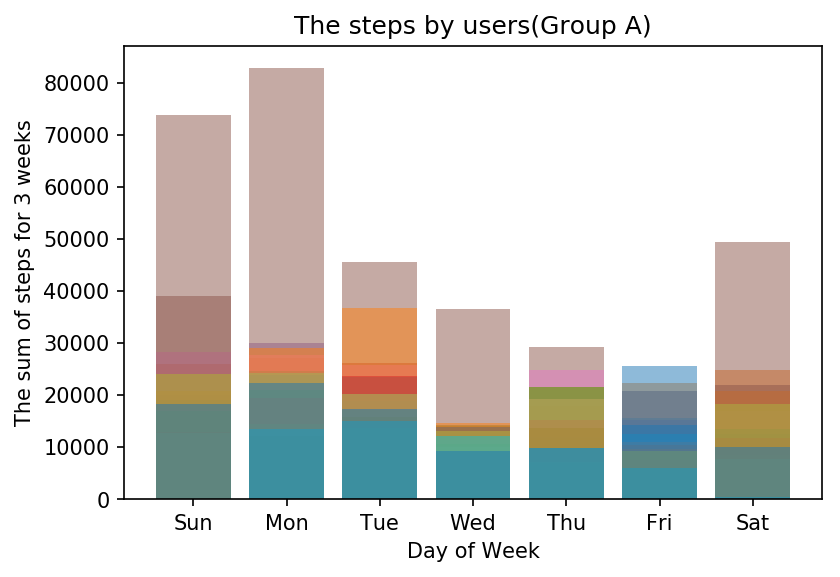

In [2]:
%matplotlib inline

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

matplotlib.rcParams['figure.dpi'] = 150

cursor = conn.cursor()

cursor.execute(('SELECT '
              + 'strftime("%w", datetime(datetime, "unixepoch")) '
              + 'as week, user, sum(value) '
              + 'FROM steps WHERE user LIKE "A%" '
              + 'GROUP BY week, user '
              + 'ORDER BY user ASC, week ASC'))
data = cursor.fetchall()

count = 0
x_axis = list()
y_axis = list()
for row in data:
    x_axis.append(row[0])
    y_axis.append(row[2])
    count = count + 1
    if count == 7:
        plt.bar(x_axis, y_axis, alpha = 0.5)
        x_axis.clear()
        y_axis.clear()
        count = 0
        
plt.xticks(range(0, 7),
           ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlabel('Day of Week')
plt.ylabel('The sum of steps for 3 weeks')
plt.title('The steps by users(Group A)')
plt.show()

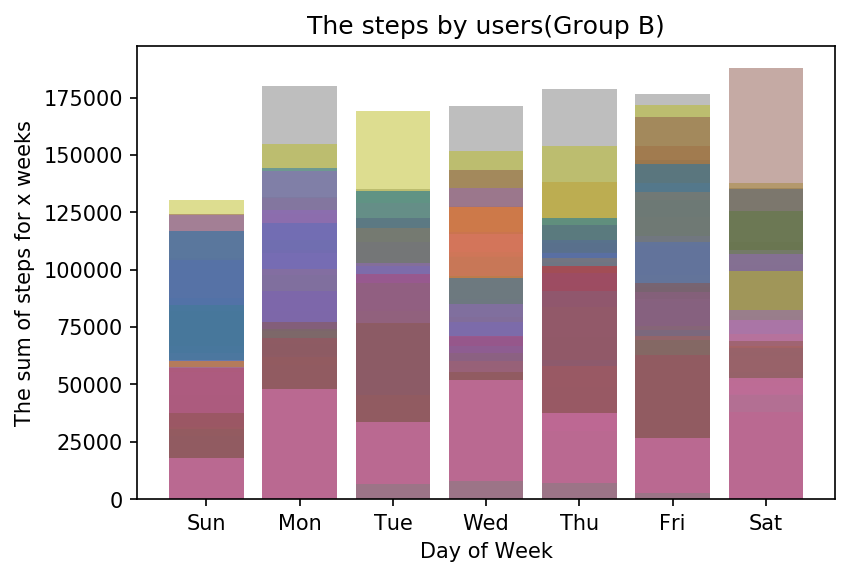

In [3]:
%matplotlib inline

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

matplotlib.rcParams['figure.dpi'] = 150

cursor = conn.cursor()

cursor.execute(('SELECT '
              + 'strftime("%w", datetime(datetime, "unixepoch")) '
              + 'as week, user, sum(value) '
              + 'FROM steps WHERE user LIKE "B%" '
              + 'GROUP BY week, user '
              + 'ORDER BY user ASC, week ASC'))
data = cursor.fetchall()

count = 0
x_axis = list()
y_axis = list()
for row in data:
    x_axis.append(row[0])
    y_axis.append(row[2])
    count = count + 1
    if count == 7:
        plt.bar(x_axis, y_axis, alpha = 0.5)
        x_axis.clear()
        y_axis.clear()
        count = 0
        
plt.xticks(range(0, 7),
           ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlabel('Day of Week')
plt.ylabel('The sum of steps for x weeks')
plt.title('The steps by users(Group B)')
plt.show()

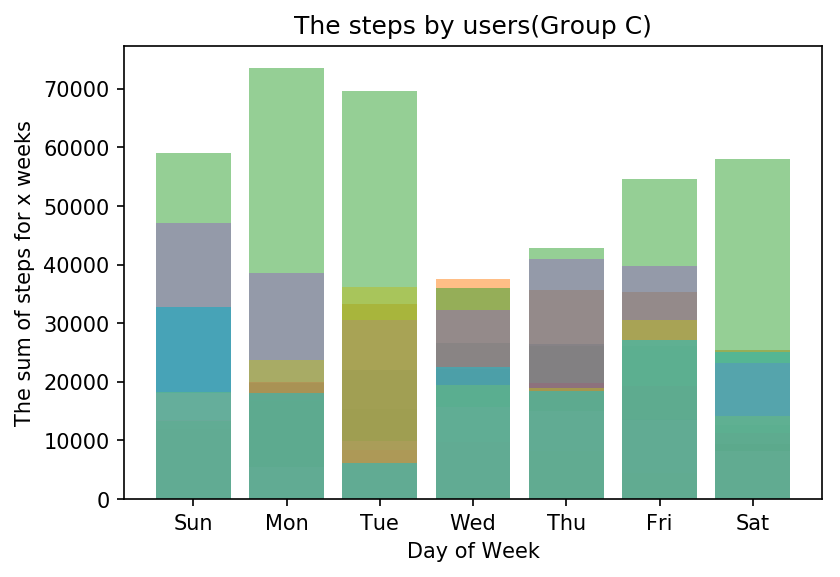

In [4]:
%matplotlib inline

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

matplotlib.rcParams['figure.dpi'] = 150

cursor = conn.cursor()

cursor.execute(('SELECT '
              + 'strftime("%w", datetime(datetime, "unixepoch")) '
              + 'as week, user, sum(value) '
              + 'FROM steps WHERE user LIKE "C%" '
              + 'GROUP BY week, user '
              + 'ORDER BY user ASC, week ASC'))
data = cursor.fetchall()

count = 0
x_axis = list()
y_axis = list()
for row in data:
    x_axis.append(row[0])
    y_axis.append(row[2])
    count = count + 1
    if count == 7:
        plt.bar(x_axis, y_axis, alpha = 0.5)
        x_axis.clear()
        y_axis.clear()
        count = 0
        
plt.xticks(range(0, 7),
           ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlabel('Day of Week')
plt.ylabel('The sum of steps for x weeks')
plt.title('The steps by users(Group C)')
plt.show()

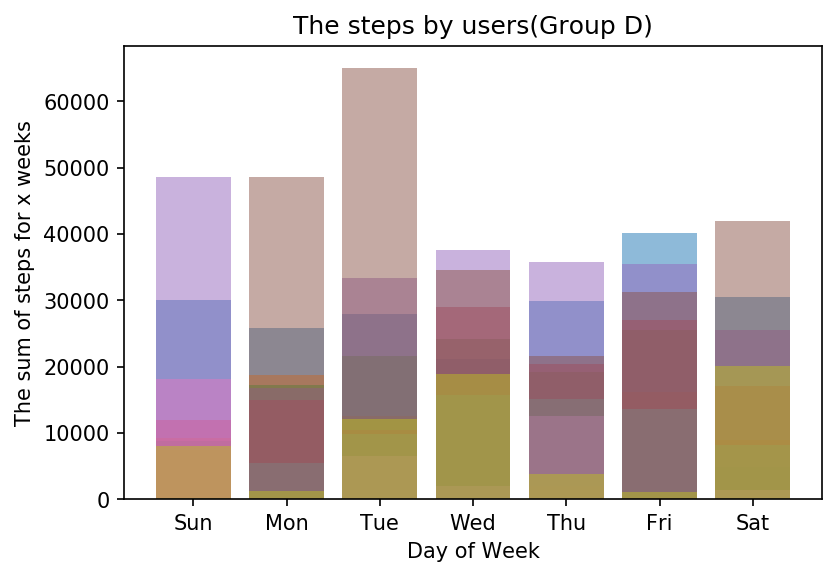

In [5]:
%matplotlib inline

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

matplotlib.rcParams['figure.dpi'] = 150

cursor = conn.cursor()

cursor.execute(('SELECT '
              + 'strftime("%w", datetime(datetime, "unixepoch")) '
              + 'as week, user, sum(value) '
              + 'FROM steps WHERE user LIKE "D%" '
              + 'GROUP BY week, user '
              + 'ORDER BY user ASC, week ASC'))
data = cursor.fetchall()

count = 0
x_axis = list()
y_axis = list()
for row in data:
    x_axis.append(row[0])
    y_axis.append(row[2])
    count = count + 1
    if count == 7:
        plt.bar(x_axis, y_axis, alpha = 0.5)
        x_axis.clear()
        y_axis.clear()
        count = 0
        
plt.xticks(range(0, 7),
           ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlabel('Day of Week')
plt.ylabel('The sum of steps for x weeks')
plt.title('The steps by users(Group D)')
plt.show()

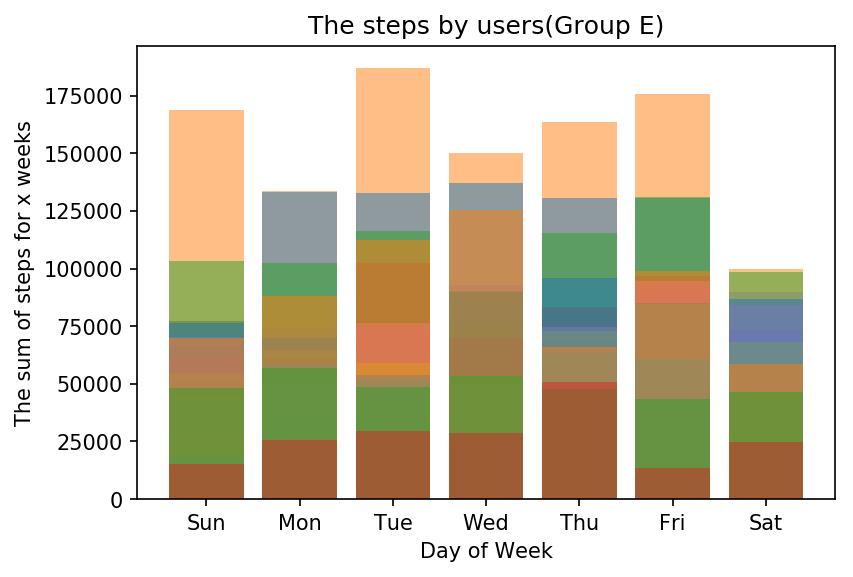

In [6]:
%matplotlib inline

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

matplotlib.rcParams['figure.dpi'] = 150

cursor = conn.cursor()

cursor.execute(('SELECT '
              + 'strftime("%w", datetime(datetime, "unixepoch")) '
              + 'as week, user, sum(value) '
              + 'FROM steps WHERE user LIKE "E%" '
              + 'GROUP BY week, user '
              + 'ORDER BY user ASC, week ASC'))
data = cursor.fetchall()

count = 0
x_axis = list()
y_axis = list()
for row in data:
    x_axis.append(row[0])
    y_axis.append(row[2])
    count = count + 1
    if count == 7:
        plt.bar(x_axis, y_axis, alpha = 0.5)
        x_axis.clear()
        y_axis.clear()
        count = 0
        
plt.xticks(range(0, 7),
           ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlabel('Day of Week')
plt.ylabel('The sum of steps for x weeks')
plt.title('The steps by users(Group E)')
plt.show()

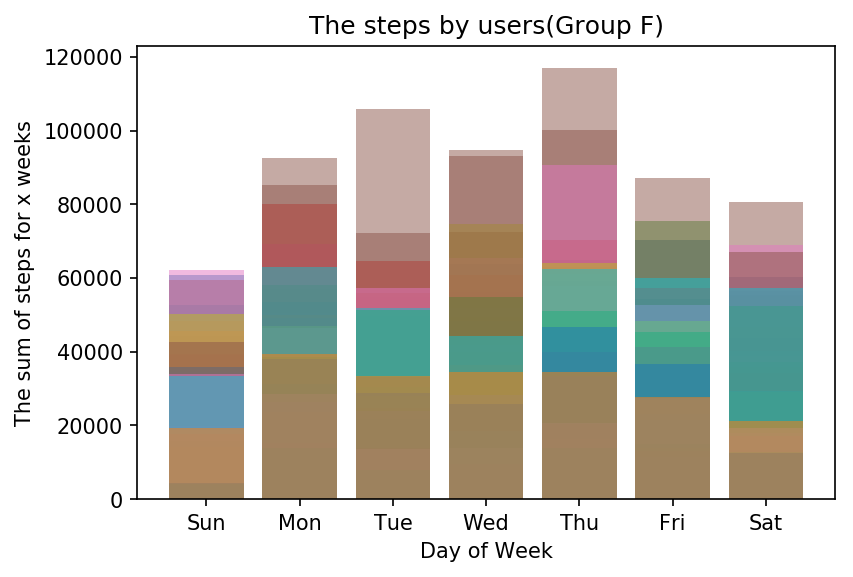

In [7]:
%matplotlib inline

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

matplotlib.rcParams['figure.dpi'] = 150

cursor = conn.cursor()

cursor.execute(('SELECT '
              + 'strftime("%w", datetime(datetime, "unixepoch")) '
              + 'as week, user, sum(value) '
              + 'FROM steps WHERE user LIKE "F%" '
              + 'GROUP BY week, user '
              + 'ORDER BY user ASC, week ASC'))
data = cursor.fetchall()

count = 0
x_axis = list()
y_axis = list()
for row in data:
    x_axis.append(row[0])
    y_axis.append(row[2])
    count = count + 1
    if count == 7:
        plt.bar(x_axis, y_axis, alpha = 0.5)
        x_axis.clear()
        y_axis.clear()
        count = 0
        
plt.xticks(range(0, 7),
           ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlabel('Day of Week')
plt.ylabel('The sum of steps for x weeks')
plt.title('The steps by users(Group F)')
plt.show()

In [8]:
# close database connector
conn.close()